In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [2]:
#Here we are going to use the IMDB data set for text classification using keras and bi-LSTM network 

n_unique_words = 1000  # cut text after this number
maxlen = 200
batch_size = 128


y(target variable) is binary classification we will use bidirectional LSTM to do this.

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=n_unique_words)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)

y_train = np.array(y_train)
y_test = np.array(y_test)

### LSTM bidirectional Model

In [5]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length = maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [7]:
## fit the data to model
history = model.fit(X_train, y_train, batch_size = batch_size, 
                    epochs = 10,
                    validation_data = [X_test, y_test])

print(history.history['loss'])
print(history.history['accuracy']) 

Epoch 1/10
196/196 [==============================] - 19s 47ms/step - loss: 0.4629 - accuracy: 0.7738 - val_loss: 0.3673 - val_accuracy: 0.8399
Epoch 2/10
196/196 [==============================] - 7s 36ms/step - loss: 0.3429 - accuracy: 0.8557 - val_loss: 0.3276 - val_accuracy: 0.8583
Epoch 3/10
196/196 [==============================] - 11s 56ms/step - loss: 0.3277 - accuracy: 0.8617 - val_loss: 0.3369 - val_accuracy: 0.8540
Epoch 4/10
196/196 [==============================] - 11s 54ms/step - loss: 0.3098 - accuracy: 0.8703 - val_loss: 0.3297 - val_accuracy: 0.8614
Epoch 5/10
196/196 [==============================] - 12s 64ms/step - loss: 0.2974 - accuracy: 0.8755 - val_loss: 0.3305 - val_accuracy: 0.8589
Epoch 6/10
196/196 [==============================] - 8s 43ms/step - loss: 0.2934 - accuracy: 0.8773 - val_loss: 0.3488 - val_accuracy: 0.8582
Epoch 7/10
196/196 [==============================] - 8s 40ms/step - loss: 0.2833 - accuracy: 0.8795 - val_loss: 0.3340 - val_accuracy: 0.

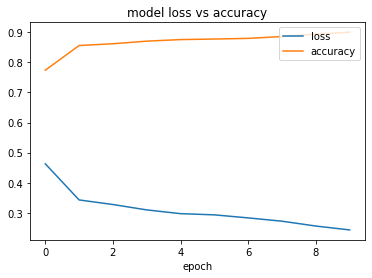

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show() 

WE got the accuracy of 86.5% and loss as 35% 